In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import quad

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})


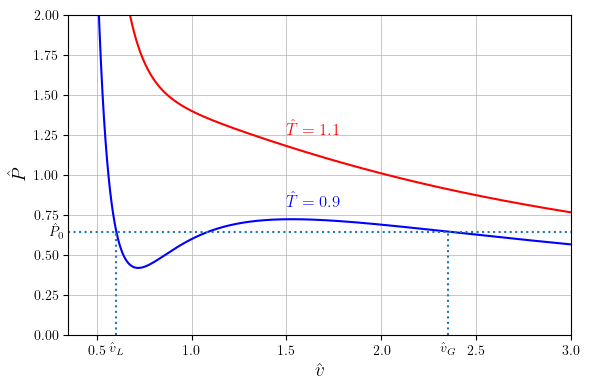

In [ ]:
def P_hat(v, T):
    return (8.0*T/3.0)/(v - 1.0/3.0) - 3.0/v**2

def maxwell_coexistence(T):
    def dPdv(v): return -8.0*T/(3.0*(v-1.0/3.0)**2) + 6.0/v**3

    vs = np.linspace(0.4, 10, 5000)
    s = np.sign(dPdv(vs))
    zero_idxs = np.where(np.diff(s) != 0)[0]

    spinodals = []
    for idx in zero_idxs:
        guess = vs[idx]
        root = fsolve(dPdv, guess)[0]
        if 0.4 < root < 10:
            spinodals.append(root)
    spinodals = sorted(set(np.round(spinodals,6)))
    v_sp_small, v_sp_large = spinodals

    def area_diff(P0):
        # find the roots of P(v)=P0
        v1 = fsolve(lambda v: P_hat(v, T) - P0, v_sp_small-.6)[0]  # hack to avoid finding unstable root in middle
        v2 = fsolve(lambda v: P_hat(v, T) - P0, v_sp_large)[0]
        A = quad(lambda vv: P_hat(vv, T), v1, v2)[0]
        return A - P0*(v2 - v1)

    P0_guess = P_hat((v_sp_small+v_sp_large)/2, T)
    P0 = fsolve(area_diff, P0_guess)[0]

    # then the coexistence volumes
    vL = fsolve(lambda v: P_hat(v, T) - P0, v_sp_small - 0.6)[0]
    vG = fsolve(lambda v: P_hat(v, T) - P0, v_sp_large)[0]
    return vL, vG, P0

# compute coexistence at T=0.9
vL, vG, P0 = maxwell_coexistence(0.9)

v = np.linspace(0.35, 3.0, 1000)
P1 = P_hat(v, 1.1)
P2 = P_hat(v, 0.9)

plt.figure(figsize=(6,4))
plt.plot(v, P1, color='red',   linewidth=1.5)
plt.plot(v, P2, color='blue',  linewidth=1.5)

plt.hlines(P0, 0.35, 3.0, linestyles='dotted')
plt.vlines([vL, vG], 0, P0,      linestyles='dotted')

plt.text(1.5, 1.25, r'$\hat T=1.1$', color='red',   fontsize=12)
plt.text(1.5, 0.80, r'$\hat T=0.9$', color='blue', fontsize=12)

plt.text(vL, -0.05,  r'$\hat v_L$', ha='center', va='top', fontsize=10)
plt.text(vG, -0.05,  r'$\hat v_G$', ha='center', va='top', fontsize=10)
plt.text(0.25, P0,   r'$\;\hat P_0$', ha='left',  va='center', fontsize=10)

plt.xlabel(r'$\hat v$', fontsize=14)
plt.ylabel(r'$\hat P$', fontsize=14)
plt.xlim(0.35, 3.0)
plt.ylim(0, 2.0)
plt.grid(True, which='both', ls='-', lw=0.5)
plt.tight_layout()
# plt.savefig('../../../figs/nle/vdw_eos.pdf', bbox_inches='tight', transparent=True)
plt.show()